<a href="https://colab.research.google.com/github/sarenales/Intro_python_basico/blob/main/Intro_PygameZero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Pygame Zero 🎮⭐

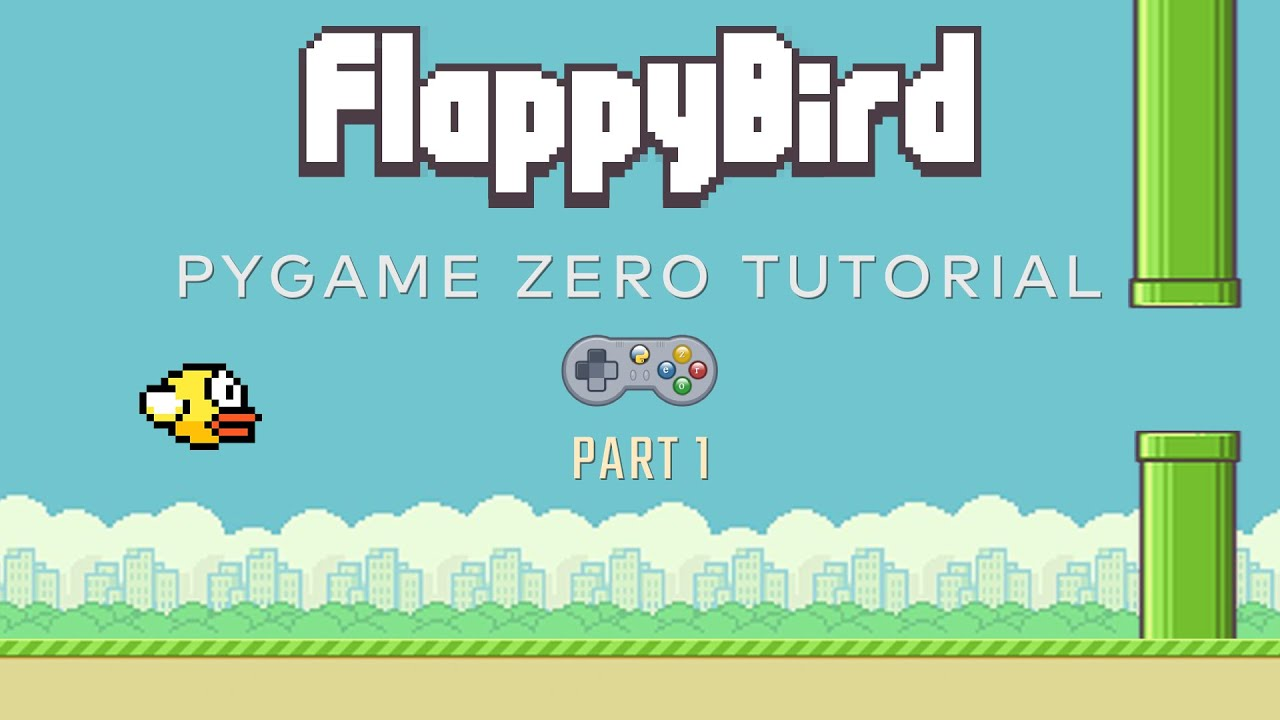

https://pygame-zero.readthedocs.io/en/latest/index.html


## Dibujando el fondo ☁🌞

Agreguemos una función draw() y establezcamos las dimensiones de la ventana. Pygame Zero llamará a esta función cada vez que necesite pintar la pantalla.

In [ ]:
WIDTH = 300   # ANCHO
HEIGHT = 300  # ALTO

def draw():
    screen.fill((128, 0, 0))

El WIDTH (ANCHO) y HEIGHT(ALTO) controlan el ancho y alto de su ventana. El código establece el tamaño de la ventana en 300 píxeles en cada dimensión.

La pantalla es una función incorporada que representa la visualización de la ventana. Tiene una variedad de métodos para dibujar sprites y formas.

La llamada al método screen.fill() llena la pantalla con un color sólido, especificado como una tupla de color (rojo, verde, azul).

(128, 0, 0) será de un rojo medio oscuro. Podemos intentar cambiar estos valores con números entre 0 y 255 y vea qué colores puede crear.

Configuremos un objeto que podamos animar.

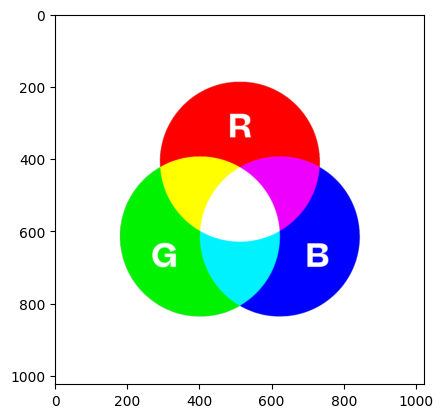

In [ ]:
import matplotlib.pyplot as plt
circles = plt.imread("RGB.png")
plt.imshow(circles)
plt.show()

## Dibujar Sprite 👽
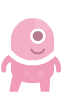

Antes de que podamos dibujar algo, necesitaremos guardar un objeto alienígena para usarlo (como la imagen del bitxito rosita). Puedes hacer clic derecho sobre este y guardarlo (“Guardar imagen como…” o similar).

(¡Este sprite tiene un canal de transparencia (o “alfa”), lo cual es excelente para juegos! Pero está diseñado para un fondo oscuro, por lo que es posible que no puedas ver el casco espacial del alienígena hasta que se muestre en el juego). Encima es muy kuki.

Debes guardar el archivo en el lugar correcto para que Pygame Zero pueda encontrarlo. Cree un directorio llamado imágenes y guarde la imagen en él como alien.png. Ambos deben estar en minúsculas. Pygame Zero se quejará de lo contrario, para alertarle sobre un posible problema de compatibilidad multiplataforma.

Si ha hecho eso, su proyecto debería verse así:


```
.
├── images/
│   └── alien.png
└── intro.py
```

*images/* es el directorio estándar en el que Pygame Zero buscará para encontrar sus imágenes.

Hay una **clase** incorporada llamada "Actor" que puede usar para representar un gráfico que se dibujará en la pantalla y será nuestro actor.

Definamos uno ahora:

In [ ]:
alien = Actor('alien')
alien.pos = 100, 56

WIDTH = 500
HEIGHT = alien.height + 20

def draw():
    screen.clear()
    alien.draw()

¡Tu alienígena debería aparecer ahora en la pantalla! Al pasar la cadena 'alienígena' a la clase Actor, carga automáticamente el objeto y tiene atributos como posicionamiento y dimensiones. Esto nos permite establecer la ALTURA de la ventana en función de la altura del extraterrestre.

El método alien.draw() dibuja el objeto en la pantalla en su posición actual.

## Moviendo el alien 👾

Pongamos al extraterrestre fuera de la pantalla; cambie la línea alien.pos para que diga:

In [ ]:
alien.topright = 0, 10

Observa cómo puede asignar a la parte superior derecha para mover al actor alienígena por su esquina superior derecha. Si el borde derecho del alienígena está en 0, el alienígena está justo fuera de la pantalla, a la izquierda. Ahora hagamos que se mueva. Agrega el siguiente código al final del archivo:

In [ ]:
def update():
    alien.left += 2
    if alien.left > WIDTH:
        alien.right = 0

Pygame Zero llamará a su función update() una vez en cada cuadro. Mover al alienígena una pequeña cantidad de píxeles en cada cuadro hará que se deslice por la pantalla. Una vez que se desliza fuera del lado derecho de la pantalla, lo reiniciamos hacia la izquierda.

## Manejo de clicks 🖱

Hagamos que el juego haga algo cuando hagas clic en el extraterrestre. Para hacer esto necesitamos definir una función llamada on_mouse_down(). Agregue esto al código fuente:

In [ ]:
def on_mouse_down(pos):
    if alien.collidepoint(pos):
        print("Eek!")
    else:
        print("You missed me!")

Deberías ejecutar el juego e intentar hacer clic dentro y fuera del alienígena.

Pygame Zero es inteligente a la hora de llamar a tus funciones. Si no define su función para que tome un parámetro pos, Pygame Zero la llamará sin una posición. También hay un parámetro de botón para on_mouse_down. Entonces podríamos haber escrito:

In [ ]:
def on_mouse_down():
    print("You clicked!")

O también

In [ ]:
def on_mouse_down(pos, button):
    if button == mouse.LEFT and alien.collidepoint(pos):
        print("Eek!")

## Sonido e imágenes 🎵📸

Ahora hagamos que el extraterrestre parezca herido. Guarde estos archivos:

* alien_hurt.png (https://pygame-zero.readthedocs.io/en/stable/_static/alien_hurt.png) : guárdelo como alien_hurt.png en el directorio de imágenes.
* eep.wav (https://pygame-zero.readthedocs.io/en/stable/_static/eep.wav): cree un directorio llamado sonidos y guárdelo como eep.wav en ese directorio.

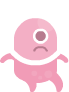

Su proyecto ahora debería verse así:


```
.
├── images/
│   └── alien.png
│   └── alien_hurt.png
├── sounds/
│   └── eep.wav
└── intro.py
```



*sonidos*/ es el directorio estándar en el que Pygame Zero buscará para encontrar sus archivos de sonido.

Ahora cambiemos la función on_mouse_down para usar estos nuevos recursos:

In [ ]:
def on_mouse_down(pos):
    if alien.collidepoint(pos):
        sounds.eep.play()
        alien.image = 'alien_hurt'

Ahora, cuando hagas clic en el alienígena, deberías escuchar un sonido y el objeto cambiará a un alienígena infeliz.

Sin embargo, hay un error en este juego; el extraterrestre nunca vuelve a convertirse en un extraterrestre feliz (pero el sonido se reproducirá con cada clic). Arreglemos esto a continuación.

## Reloj ⏲

Si está familiarizado con Python fuera de la programación de juegos, es posible que conozca el método time.sleep() que inserta un retraso. Quizás tengas la tentación de escribir un código como este:

In [ ]:
def on_mouse_down(pos):
    if alien.collidepoint(pos):
        sounds.eep.play()
        alien.image = 'alien_hurt'
        time.sleep(1)
        alien.image = 'alien'

Desafortunadamente, esto no es del todo adecuado para su uso en un juego. time.sleep() bloquea toda la actividad; Queremos que el juego siga ejecutándose y animándose. De hecho, necesitamos regresar de on_mouse_down y dejar que el juego determine cuándo restablecer el alienígena como parte de su procesamiento normal, mientras ejecutas tus métodos draw() y update().

Esto no es difícil con Pygame Zero, porque tiene un reloj incorporado que puede programar funciones para llamarlas más tarde.

Primero, "refactoricemos" (es decir, reorganicemos el código). Podemos crear funciones para configurar al alienígena como herido y también para volverlo a la normalidad:

In [ ]:
def on_mouse_down(pos):
    if alien.collidepoint(pos):
        set_alien_hurt()


def set_alien_hurt():
    alien.image = 'alien_hurt'
    sounds.eep.play()


def set_alien_normal():
    alien.image = 'alien'

Esto no va a hacer nada diferente todavía. set_alien_normal() no será llamado. Pero cambiemos set_alien_hurt() para usar el reloj, de modo que set_alien_normal() se llame un poco después.

In [ ]:
def set_alien_hurt():
    alien.image = 'alien_hurt'
    sounds.eep.play()
    clock.schedule_unique(set_alien_normal, 1.0)

clock.schedule_unique() hará que se llame a set_alien_normal() después de 1,0 segundo. Schedule_unique() también evita que la misma función se programe más de una vez, por ejemplo, si hace clic muy rápidamente.

Pruébalo y verás que el alienígena vuelve a la normalidad después de 1 segundo. Intente hacer clic rápidamente y verifique que el extraterrestre no regrese hasta 1 segundo después del último clic.